<a href="https://colab.research.google.com/github/aditigedam/ML/blob/main/red_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wine_data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv',sep=";")

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#taking quality as dependent variable(y)
#checking for data imbalancy
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

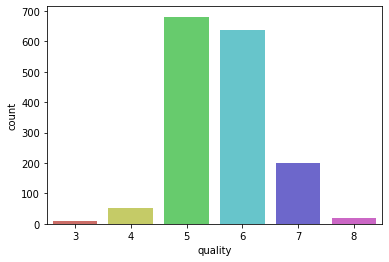

In [ ]:
import seaborn as sns
sns.countplot(x='quality',data = wine_data,palette = 'hls')

In [ ]:
# data is not balance as majority is faling under 5 and 6
# hence have to do oversampling

In [ ]:
#first spliting the data
y = wine_data['quality']
x= wine_data.drop('quality',axis=1)

In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE
os = SMOTE()
x_res, y_res = os.fit_resample(x,y)

In [ ]:
#traing and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.1)

LinearRegression

In [ ]:
#traing model
from sklearn.linear_model import LinearRegression as lr
model = lr()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
acc = model.score(x_test,y_test)
acc

0.7107512980889763

In [ ]:
predict = model.predict(x_test)

Text(0, 0.5, 'predict')

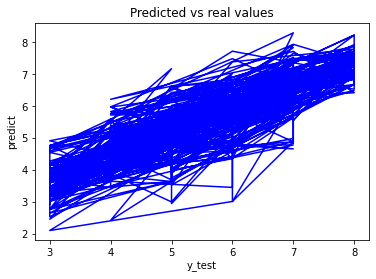

In [ ]:
plt.title('Predicted vs real values')
plt.plot(y_test, predict, color='blue')
plt.xlabel('y_test')
plt.ylabel('predict')

#KNN

In [ ]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1,p=1)
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
acc

0.8820526151184185

In [ ]:
y_predict = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[70,  0,  1,  0,  0,  0],
       [ 0, 60,  5,  3,  0,  0],
       [ 2,  3, 42, 21,  3,  0],
       [ 1,  5, 17, 31,  4,  3],
       [ 0,  0,  0,  0, 72,  0],
       [ 0,  0,  1,  1,  2, 62]])

#svm

In [ ]:
from sklearn import svm
model = svm.SVC(C = 7, gamma=2)
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
acc

0.7579462102689487

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
# cm = confusion_matrix(y_pred,y_test)
# cm

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[61,  0,  9,  1,  0,  0],
       [ 0, 48, 19,  1,  0,  0],
       [ 0,  2, 59, 10,  0,  0],
       [ 0,  1, 31, 28,  1,  0],
       [ 0,  0,  8,  3, 61,  0],
       [ 0,  0, 10,  3,  0, 53]])

#decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
acc

0.839691230407428

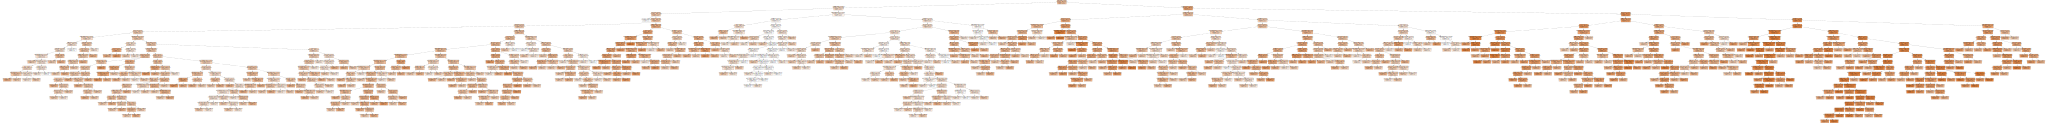

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz 

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
dot_data = export_graphviz(model, out_file =None,filled =True,
               feature_names =['fixed acidity',	'volatile acidity',	'citric acid','residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']) 
graph = graphviz.Source(dot_data)
graph.render("entropy")
graph

#RandomForest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
acc

0.9268400612502691